In [1]:
from matplotlib.widgets import Slider, Button
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook


In [5]:
df=pd.read_csv('df_clean.csv')

<IPython.core.display.Javascript object>


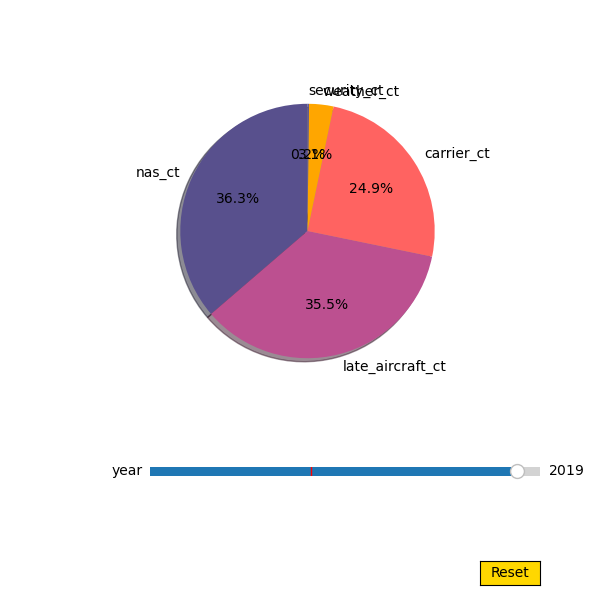

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.subplots_adjust(bottom=0.35)
y = 2010

plt.pie(np.sum(df[df['year']==y].loc[:,['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']]).sort_values(ascending=False)
       ,colors=['#58508d','#bc5090','#ff6361','#ffa600'])

axyear = plt.axes([0.25, 0.2, 0.65, 0.03])

year = Slider(axyear, 'year', 2003, 2020, 2010,valstep=1)

def update(val):
    ax.clear()
    y = year.val
    ax.pie(np.sum(df[df['year']==y].loc[:,['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']]).sort_values(ascending=False),
           labels=np.sum(df[df['year']==y].loc[:,['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']]).sort_values(ascending=False).index
           ,autopct='%1.1f%%'
           ,shadow=True
           ,startangle=90
          ,colors=['#58508d','#bc5090','#ff6361','#ffa600'])


year.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color='gold',
                hovercolor='skyblue')

def resetSlider(event):
    year.reset()
    
button.on_clicked(resetSlider)


plt.show()